# Convergence criteria for the excitonic states

In [1]:
%autosave 0
from BigDFT import Logfiles as lf
from BigDFT import Calculators as C
from futile import Yaml
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import sys
sys.path.insert(0,'../')
import Routine as R
outputpath = 'linear-response/'

Autosave disabled


The aim of this notebook is to define the tools for perfoming a (semi)-automatic analysis of the excitations of the system. We want to define a procedure that is able to state if a given excitation can be considered as "well-sampled" or not (using the given values of number of virtual states and dimension of the simulation box)

We read the results for the excitations and for the log of DFT and organize them in a dictionary according to rmult

In [2]:
numOrb = 5
rmult = [7.0, 9.0]
nVirtMax = [303, 279]
excitations = {}
Data = {}

%cd $outputpath
for ind, r in enumerate(rmult):
    filename = 'log/excitations_rmult'+str(r)+'.yaml '
    excitations[r] = Yaml.load(filename)
    logpath = 'log/log-NumVirt_'+str(nVirtMax[ind])+'.yaml'
    log = !ls $logpath
    Data[r] = lf.Logfile(log[0])
%cd ..

/media/DATA/RICERCA/LINEAR RESPONSE/LR-nb/POLARIZABILITY/N2/linear-response
/media/DATA/RICERCA/LINEAR RESPONSE/LR-nb/POLARIZABILITY/N2


In [3]:
#excitations[7][32]['transitions']

We display the list of the labels of all the transitions considered in exc, using the appropriate method. The list of the transition is sorted in order of increasing energy.

In [4]:
reload(R)
allTr = R.allTransitions(excitations[7.0])
print allTr[0:]

['3,4to1,2-0', '5to1-0+5to2-0', '3,4to1,2-1', '3,4to1,2-2', '5to1-1+5to2-1', '3,4to1,2-3+3,4to1,2-4', '3,4to1,2-5', '3,4to1,2-6', '2to1,2-1+2to1,2-0', '5to3-0', '5to3-1', '5to4-0', '5to4-1', '5to6-0+5to5-0', '5to6-1+5to5-1', '3to3-0+4to3-0', '3to3-1+4to3-1', '2to1-0+2to2-0', '2to1-1+2to2-1', '2to2-1', '2to1-1', '3,4to5,6-0', '5to7-0', '5to7-1', '3,4to5,6-1']


## Stability of the energy of the excitonic states

As a first criterium for study of the reliability of an excitation we analyze the stability of its energy. We consider an excitation as well-sampled if two condition are satisfied:
* the variation of its energy as the number of virtual states is increased is below a given threshold
* the values of the energy of the excitation obtained for two different box are equal with a given tolerance 

In [5]:
selLab = allTr[1:2]
print selLab

['5to1-0+5to2-0']


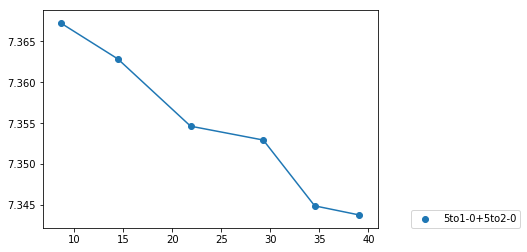

In [6]:
%matplotlib inline
r = 7
R.pltTrLabel(selLab,excitations[r],Data[r],numOrb,True)

### Analysis of the dipendence of the energy to the number of virtual orbitals

### Analysis of the dipendence of the energy with respect to the box size

In [31]:
# box dipendence homo-lumo gap
v = []
for d in Data.values():
    v.append(27.211*(d.evals[0][0][numOrb]-d.evals[0][0][numOrb-1]))
print 'Delta HOMO-LUMO', abs(v[0]-v[1])
# energy highest bound virtual state (state number seven)
v = []
for d in Data.values():
    v.append(27.211*d.evals[0][0][6])
print 'Delta highest bound', abs(v[0]-v[1])

Delta HOMO-LUMO 0.00111483372394
Delta highest bound 0.00136220664727


In [32]:
selLab = allTr[0:1]
selLab

['3,4to1,2-0']

In [41]:
for s in selLab:
    print excitations[7][128]['transitions'][s]['eng']
    print excitations[9][279]['transitions'][s]['eng']
    

7.34587283931
7.33810840211


Cosi non ha molto senso, è un confronto fatto con un numero di orbitali vuoti diverso e una energia massima molto diversa (anche a causa del collasso del continuo), credo vada fatto scegliendo il numero di orbitali vuoti del caso r=7 in modo che la emax coincida per le 2 box....